Lattice plasmon resonances in thin films
========

Must change title eventually

Supporting information - couple dipole approximation (CDA)
--------

Abstract
--------

Optical resonances in films containing plasmonic nanoparticles in two-dimensional ordered lattices show interesting dependence on the thickness of the containing film. Here we use the coupled dipole approximation to show that these thickness-dependent resonances are the result of plasmonic coupling to reflections at the air-film interface. 

# Initialize analysis

## Initialize computational/python framework

In [1]:
%run "header.py"

Loading import modules ...
  ... math, cmath (local)
  ... os, sys, types, importlib
  ... time, datetime
  ... ipyparallel as ipp
  ... numpy as np
  ... scipy as sp
      scipy.special (local, for Bessel functions)
      scipy.interpolate as interpolate
      scipy.signal as signal
  ... matplotlib
      matplotlib.pyplot as plt
      matplotlib.cm as cm
      matplotlib.pylab as pylab
  ... peakutils
Defining fundamental constants ...
  ... Avogadro's number: 'AvogadroN'
  ... speed of light: 'cumfs','cnmfs'
  ... Planck's constant: 'heVfs','hbareVfs'
  ... electron rest mass: 'eMass0eVnmfs'
  ... permittivity of free space: 'eps0enmV'
Loading analysis codes ... 
  ... refractive index functions loaded:
       Au, Ag, SiO2, ITO, ZnO, H2O, 
       ethanol, CS2, benzene, toluene, 
       chloroform, methanol, butanol, 
       propanol
  ... Mie functions loaded
  ... CDA functions loaded
  ... lattice generation functions loaded:
       hexagonal 2D
Ready player one.


# Compute CDA

## Single layer

### General formula with position vectors

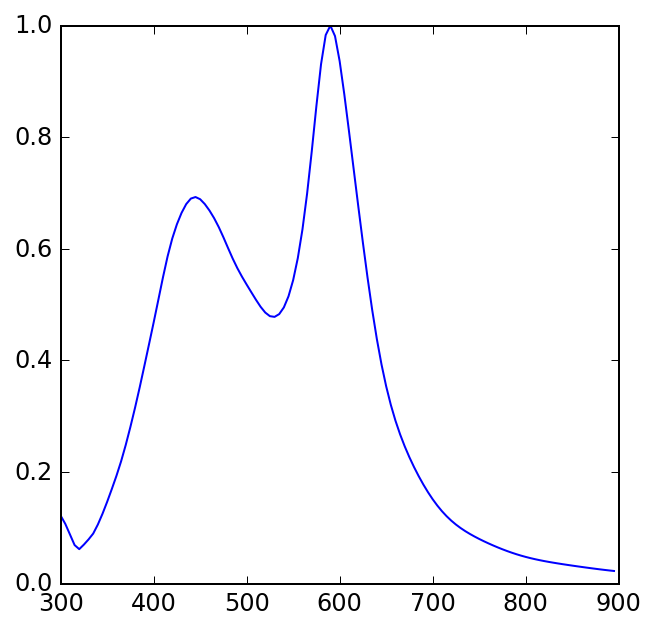

In [7]:
log2alpha = -0.5
dccnm = 430
coreRnm = 48
Rnms = [coreRnm]

RvecList, RmagList = lattices.RvecRmagListsHex(10)
RvecListnm = [i*dccnm for i in RvecList]

def CextCDA(wl0nm): 
    ns = [ri.nAg(wl0nm), 1.48]
    nmed = ns[-1]
    k0nm = (2*pi/wl0nm)
    knm = nmed*k0nm
    kinm = (2**log2alpha)/(2*dccnm)
    kLatticeSumnm = knm + 1j*kinm

    SMatnm3 = cda.latticeSumSMat(RvecListnm, kLatticeSumnm)
    Snm3 = SMatnm3[0,0] # x-polarized light
    alpha1nm3 = mie.alpha(ns, Rnms, k0nm)
    
    return cda.CextCDA(Snm3, alpha1nm3, knm)

wlListnm = np.arange(300,900,5)
CextListnm = list(map(CextCDA, wlListnm))
pylab.plot(wlListnm, CextListnm/max(CextListnm))

### Simplified geometry formula

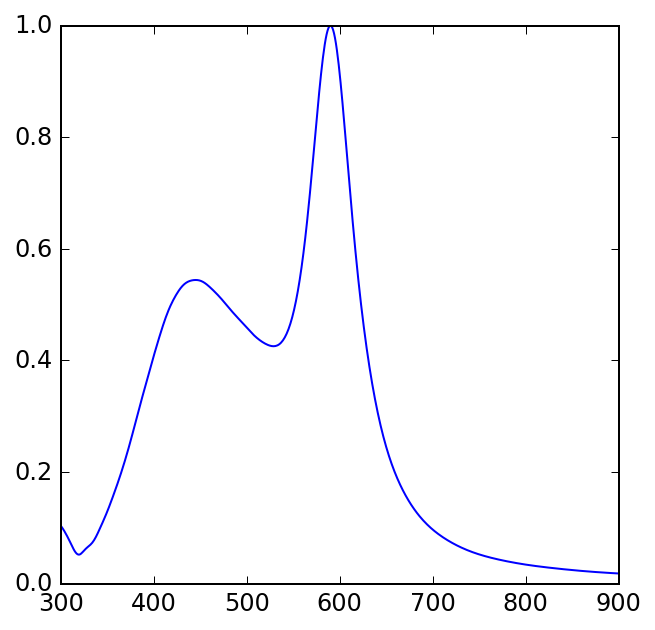

In [4]:
log2alpha = -0.5
dccnm = 430
coreRnm = 48
Rnms = [coreRnm]

RmagList, NList = lattices.RmagNListHex(15)
RmagListnm = [i*dccnm for i in RmagList]

def CextCDA(wl0nm): 
    ns = [ri.nAg(wl0nm), 1.48]
    nmed = ns[-1]
    k0nm = (2*pi/wl0nm)
    knm = nmed*k0nm
    kinm = (2**log2alpha)/(2*dccnm)
    kLatticeSumnm = knm + 1j*kinm

    Snm3 = cda.latticeSumS0(RmagListnm, NList, kLatticeSumnm)
    alpha1nm3 = mie.alpha(ns, Rnms, k0nm)
    
    return cda.CextCDA(Snm3, alpha1nm3, knm)

wlListnm = np.arange(300,900,1)
CextListnm = list(map(CextCDA, wlListnm))
pylab.plot(wlListnm, CextListnm/max(CextListnm))

## Bi-layer

### General formula

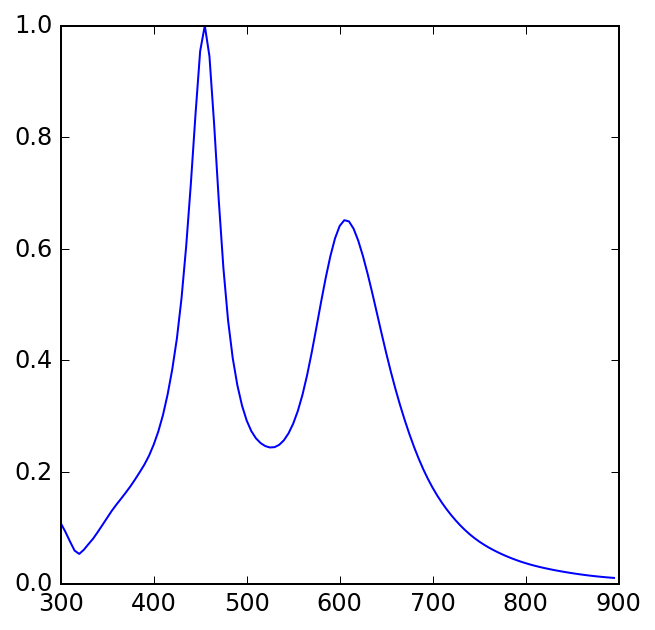

In [13]:
log2alpha = -0.5
dccnm = 430
coreRnm = 48
thicknessnm = 150

dz = 2*thicknessnm/dccnm
RvecList, RmagList = lattices.RvecRmagListsHex(15)
RvecListnm = ([i*dccnm for i in RvecList] + 
              [(i + [0,0,dz])*dccnm for i in RvecList])

def CextCDA(wl0nm): 
    Rnms = [coreRnm]
    ns = [ri.nAg(wl0nm), 1.48]
    nmed = ns[-1]
    k0nm = (2*pi/wl0nm)
    knm = nmed*k0nm
    kinm = (2**log2alpha)/(2*dccnm)
    kLatticeSumnm = knm + 1j*kinm

    SMatnm3 = cda.latticeSumSMat(RvecListnm, kLatticeSumnm)
    Snm3 = SMatnm3[0,0] # x-polarized light
    alpha1nm3 = mie.alpha(ns, Rnms, k0nm)
    
    return cda.CextCDA(Snm3, alpha1nm3, knm)

wlListnm = np.arange(300,900,5)
CextListnm = list(map(CextCDA, wlListnm))
pylab.plot(wlListnm, CextListnm/max(CextListnm))

### Simplified formula without z-coupling

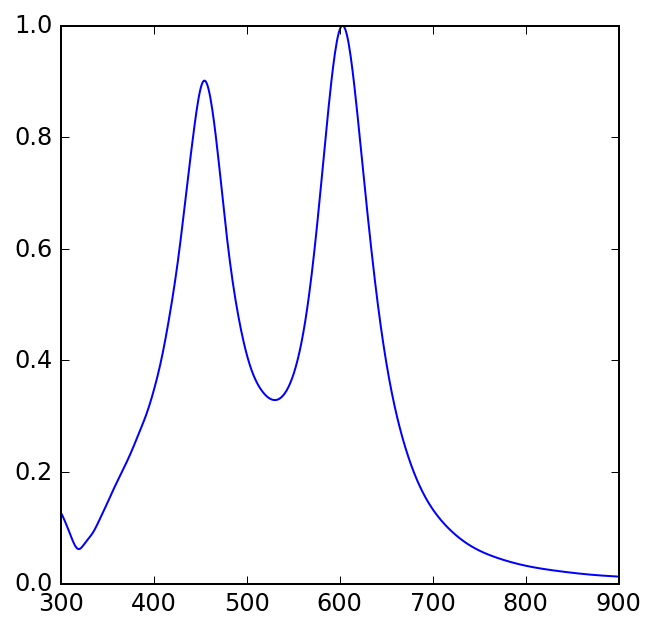

In [6]:
log2alpha = -0.5
dccnm = 430
coreRnm = 48
thicknessnm = 150

dz = 2*thicknessnm/dccnm
RmagList0, NList0 = lattices.RmagNListHex(15)
RmagList2 = [abs(sqrt(R**2 + dz**2)) for R in RmagList0]
RmagList = RmagList0 + RmagList2
NList = NList0 + NList0
RmagListnm = [i*dccnm for i in RmagList]

def CextCDA(wl0nm): 
    Rnms = [coreRnm]
    ns = [ri.nAg(wl0nm), 1.48]
    nmed = ns[-1]
    k0nm = (2*pi/wl0nm)
    knm = nmed*k0nm
    kinm = (2**log2alpha)/(2*dccnm)
    kLatticeSumnm = knm + 1j*kinm

    Snm3 = cda.latticeSumS0(RmagListnm, NList, kLatticeSumnm)
    alpha1nm3 = mie.alpha(ns, Rnms, k0nm)
    
    return cda.CextCDA(Snm3, alpha1nm3, knm)

wlListnm = np.arange(300,900,1)
CextListnm = list(map(CextCDA, wlListnm))
pylab.plot(wlListnm, CextListnm/max(CextListnm))